# Steps
1. data collection
2. Understanding the data
3. Data cleaning
4. Loading the training set
5. Data preprocessing - images
6. Data preprocessing - Captions
7. Data preparation using Generator Function
8. Word Embeddings
9. Model Architecture
10. Inference
11. Evaluation

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import nltk
import string
import json
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input,Dense,Dropout,Embedding, LSTM
from keras.layers.merge import add


In [4]:
#read text caption

def readTextFile(path):
    with open(path) as f:
        captions = f.read() #readline to read each line
    return captions
        

In [5]:
captions = readTextFile("flickr_dataset/Flickr8k_text/Flickr8k.token.txt")
captions = captions.split("\n")[:-1]
#len(captions.split("\n"))  --> 40461

In [6]:
len(captions)

40460

In [7]:
captions[-1]

'997722733_0cb5439472.jpg#4\tA rock climber practices on a rock climbing wall .'

In [8]:
captions[0]

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .'

In [9]:
first, second = captions[0].split("\t")
print(first.split(".")[0])
print(second)

1000268201_693b08cb0e
A child in a pink dress is climbing up a set of stairs in an entry way .


In [10]:
print(captions[2])

1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .


In [11]:
descriptions = {}

for i in range(0,40460):
    first, second = captions[i].split("\t")
    img_name = first.split(".")[0]
    
    #if the image id is already present or not
    if descriptions.get(img_name) is None:
        descriptions[img_name] = []
        
    descriptions[img_name].append(second)

In [12]:
descriptions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [13]:
!pip3 install opencv-python

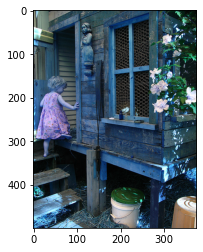

In [14]:
IMG_PATH = "flickr_dataset/Flicker8k_Dataset/"

import cv2
from matplotlib import pyplot as plt

img = cv2.imread(IMG_PATH+"1000268201_693b08cb0e.jpg")
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# data cleaning

In [17]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]"," ", sentence)
    sentence = sentence.split()
    
    sentence = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence
    

In [18]:
clean_text("A cat is sitting over the house number 64")

'cat is sitting over the house number'

In [19]:
#clean all captions
for key, caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i] = clean_text(caption_list[i])

In [20]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [22]:
# write the data to text file
with open("descriptions_1.txt","w") as f:
    f.write(str(descriptions))